# TP2 : Séparateurs à Vaste Marge

## 1/ Données

In [1]:
import numpy as np

def load_breastcancer(filename):
    """
    Cette fonction lit le fichier filename, par exemple
    filename = 'wdbc_M1_B0.data'
    Elle retourne 
    X : une matrice de caracteristiques
    y : un vecteur des classes tel que si y[i] = 1, la tumeur est maligne
        et si y[i] = -1, la tumeur est benigne

    Pour plus d'infos sur la base de donnees,
    https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29
    """

    data = np.loadtxt(filename, delimiter=',')

    # la colonne 0 ne nous interesse pas ici
    y = data[:, 1] * 2 - 1
    X = data[:, 2:]

    # Standardisation de la matrice
    X = X - np.mean(X, axis=0)
    X = X / np.std(X, axis=0)

    return X, y

In [2]:
X, y = load_breastcancer("wdbcM1B0.data")

## 2/ Méthode du sous-gradient 

### Q 2.1/
Soit $\Xi_i (v,a) = [max(0, 1-y_i(x_i^T v+ a); + \infty[$

Soit $\Xi (v,a) = \prod_i \Xi_i (v,a)$

$\forall$ $v \in R_m$, $a \in R$, $\xi \in \Xi (v,a)$, $\space$ soit $f(v, a, \xi) = \frac{1}{2} \sum_j v_j^2 + \sum_i \xi_i$. $f$ est une fonction croissante de $\xi_i \, \forall i$ (et pour tout $v, a, \xi_j (j\ne i)$  fixés).

Soit $\xi_{min} = (\xi_{{min}_i})_i$ avec $\xi_{min_i} = max(0, 1-y_i(x_i^T v+ a)$

Alors on a $\forall$ $v \in R_m$, $a \in R$, $\xi \in \Xi (v,a)$, $f(v, a, \xi) \ge f(v, a, \xi_{min})$. (Parce que $f$ est croissante pour $\xi_i \space \forall i$.)

Donc, $min_{v,a,\xi} f(v,a,\xi) \ge min_{v,a,\xi} f(v, a, \xi_{min}) = min_{v,a} f(v, a, \xi_{min})$

On a donc la première inegalité : $min_{v,a,\xi} f(v,a,\xi) \ge min_{v,a} f(v, a, \xi_{min})$

De plus, pour toute fonction $g$ a deux variables admettant un minimum, $\forall b_o \in B, min_{a\in A, b \in B} g(a,b) \le min_{a \in A} g(a,b_o)$ 

Avec $g = f$ et $\xi_o = \xi_{min}$, $min_{v,a,\xi} f(v,a,\xi) \le min_{v,a} f(v, a, \xi_{min})$


En conclusion on a bien équivalence entre les deux problèmes.

Et on peut définir $f(v, a) = f(v, a, \xi_{min})$

### Q 2.2/

In [3]:
import matplotlib.pyplot as plt

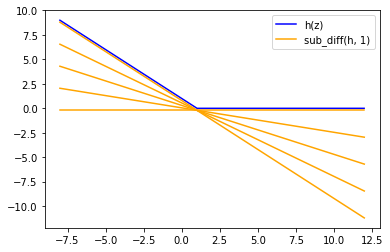

In [4]:
def h(z):
    return np.maximum(np.zeros(z.shape),1-z)

z = np.arange(-8,12,0.01)
plt.plot(z, h(z), color = 'blue', label = "h(z)")
plt.plot([-8,12], [-0.2,-.2], color = 'orange', label = "sub_diff(h, 1)")
plt.plot([-8,12], [8.8, -11.2], color = 'orange')
plt.plot([-8,12], [4.3, -5.7], color = 'orange')
plt.plot([-8,12], [9*3/4-0.2,-11*3/4 -0.2], color = 'orange')
plt.plot([-8,12], [9/4-0.2,-11/4 -0.2], color = 'orange')
plt.legend()
plt.show()

h est dérivable pourr z != 1. Donc pour z !=1, $\partial h(z) = \frac{dh}{dz} (z)$.

Et pour z = 1, on remarque avec la représentation que toute les pentes entre -1 et 0 conviennent

Donc $\partial h(z) = \left \{
\begin{array} {}
    \{-1\} & if \, z \lt 1 \\
    [-1;0] & if \, z = 1 \\
    \{0\} & if \, z \gt 1 \\
\end{array}
\right .$

### Q 2.3/

Soit $N(w) = \sum_{j=1}^{m+1} N_j(w_j)$. With $\forall j \in [1;m], N_j(w_j) = \frac{1}{2}w_j^2$ and $N_{m+1} = 0$. N est separable.

Et avec $w = (v,a), N(v,a) = \frac{1}{2}\sum_j v_j^2$.

Soit $M = 
\begin{pmatrix}
y_{1} & &0 \\
& \ddots & \\
0 & & y_{n}
\end{pmatrix} \times \begin{pmatrix} 
X, &  \begin{pmatrix} 1\\\vdots\\1 \end{pmatrix}
\end{pmatrix} \in M_{n,m+1}(R)$

$M \begin{pmatrix} v\\a \end{pmatrix} = \begin{pmatrix}y_0(x_0^Tv + a)\\ \vdots \\ y_n(x_n^Tv +a) \end{pmatrix}$

Puis posons $H(x) = \sum_{i=1}^n h(x_i)$. With $h(z) = max(0,1-z)$. H est separable.

Et $H(M(v,a)) = \sum_i max(0, 1-y_i(x_i^Tv +a))$ et donc $f(v,a) = N(v,a) + cH(M(v,a))$

De plus on a $0 \in r_i(Mdom(N) - dom(H))$ puisque $dom(N) = R_m$.

Donc $\partial f(v,a) = \partial N(v,a) + cM^T \partial H (M(v,a)).$

N est derivalbe donc $\partial N(v,a) = (v, 0)$

Et H est separable donc $\partial H(M(v,a)) = \prod_i \partial h(M_i(v,a)) = \prod_i \partial h(y_i(x_i^Tv+a))$

### Q 2.4/

In [5]:
c = 1
M = np.dot(np.diag(y), np.concatenate([X, np.ones((569,1))], axis = 1))
def N(va):
    return 0.5 * np.sum(va[:-1]**2)
def H_M(va):
    return np.sum(h(np.dot(M,va)))

def f(va):
    return N(va) + c * H_M(va)

In [6]:
def delta_N(va):
    return np.concatenate([va[:-1], [0]])

def delta_H_M(va):
    """Return one element of M^T x delta_H(M(v,a))"""
    return np.dot(M.T, (np.dot(M,va)>=1)- 1)

def delta_f(va):
    return delta_N(va) + c * delta_H_M(va)

### Q 2.5/

In [7]:
def sub_grad_method(va0, N):
    va_moy = np.zeros(va0.shape)
    gamma_sum = 0
    
    for i in range(N):
        #Pour optimiser la convergence j'ai choisi de ne pas prendre le gamma
        #proposé par l'énoncé. (Il donne trop d'importance au premier terme et convergence en 1/log(N))
        #Ici j'ai une convergence en log(N)/sqrt(N) cf le poly
        gamma = 0.001/np.sqrt(i+1)
        gamma_sum += gamma
        va_moy += va0 * gamma
        
        va0 = va0 - gamma*delta_f(va0)
    
    return va_moy/gamma_sum
        

In [8]:
va0 = np.zeros((31,))
print(f(va0))
va_1 = sub_grad_method(va0, 100000)
print(f(va_1))

569.0
28.087767544895126


## 3/ Méthode du sous-gradient stochastique

### Q 3.1/
On a:

$\begin{array}{}
E(f_I(v,a)) = \sum_i P(I = i) \times f_i(v,a) \\
E(f_I(v,a)) = \frac{1}{n}\sum_i f_i(v,a) \\
E(f_I(v,a)) = \frac{1}{2} \sum_j v_j^2 + \frac{1}{n}\sum_i c\,n\,max(0,1-y_i(x_i^Tv + a))\\
E(f_I(v,a)) = \frac{1}{2} \sum_j v_j^2 + c\sum_i max(0,1-y_i(x_i^Tv + a))\\ 
E(f_I(v,a)) = f(v,a)\\
\end{array}$

### Q 3.2/

Soit $M_i = y_i(x_i^T, 1)$. $M_i\begin{pmatrix} v \\ a \\ \end{pmatrix} = y_i(x_i^Tv + a)$. 
(On peut remarquer que $M_i$ est la $i^{eme}$ ligne de M)


On a :$f_i(v,a) = N(v,a) + c \times n \times h(M_i(v,a))$

Donc : $\partial f_i(v,a) = (v,0) + c\times n\times M_i^T\partial h(M_i(v,a))$

$\partial f_i(v,a) = \left \{
\begin{array} {}
    \{(v,0) - ncM_i^T\} & if \, M_i(v,a) \lt 1 \\
    \{(v,0) + tncM_i^t,\,t \in [-1;0]\} & if \, M_i(v,a) = 1 \\
    \{(v,0)\} & if \, M_i(v,a) \gt 1 \\
\end{array}
\right .$

### Q 3.3/

In [9]:
def delta_h_M_i(va, i):
    return ((np.dot(M[i,:],va)>=1)- 1) * M[i,:]

def delta_f_i(va, i):
    return delta_N(va) + c * M.shape[0] * delta_h_M_i(va,i)

def stoch_grad_method(va0, N):
    n = M.shape[0]
    va_moy = np.zeros(va0.shape)
    gamma_sum = 0
    
    for i in range(N):
        I = np.random.randint(n)
        gamma = 0.001/np.sqrt(i+1)
        gamma_sum += gamma
        va_moy += va0 * gamma
        
        va0 = va0 - gamma * delta_f_i(va0,I)
    
    #return va0
    return va_moy/gamma_sum

In [10]:
va_2 = stoch_grad_method(va0,100000)
f(va_2)

30.10187405578579

## 4/ Méthode du lagrangien augmenté

### Q 4.1/

Le lagrangien du probleme 1 s'écrit  pour $(v,a,\xi, \phi) \in R_m \times R \times R_n \times R_n$  :
$L(v, a, \xi, \phi) = \frac{1}{2} \sum_jv_j^2 + c\sum_i\xi_i + \sum_i\phi_i \times (1-M_i(v,a)-\xi_i) + \sum_i \iota_{R_+}(\phi_i)$

$L(v, a, \xi, \phi) = \frac{1}{2} \sum_jv_j^2 + \sum_i[c\xi_i + \phi_i \times (1-M_i(v,a)-\xi_i) + \iota_{R_+}(\phi_i)]$

### Q 4.2/

Interessons nous d'abord à g comme fonction de x pour tout $\phi$.

On a deja : $g(\cdot,\phi) \in C^0(R)$. De plus, $\forall x \gt -\frac{\phi}{\rho},\, g(x, \phi) = \frac{\rho x^2}{2} + x\phi$

Donc pour $\forall x \gt -\frac{\phi}{\rho},\, g(\cdot, \phi)$ est derivable et sa dérivée vaut $\nabla_xg(x, \phi) = \rho x+ \phi$

Et, $\forall x \lt -\frac{\phi}{\rho},\, g(x, \phi) = -\frac{\phi^2}{2 \rho}$ Donc pour $\forall x \lt -\frac{\phi}{\rho},\, g(\cdot, \phi)$ est derivable et sa dérivée vaut $\nabla_xg(x, \phi) = 0$

Finalement, on peut observer que $\underset{x\to-\frac{\phi}{\rho}, x \lt -\frac{\phi}{\rho}}{\lim}(\nabla_xg(x,\phi)$ = $\underset{x\to-\frac{\phi}{\rho}, x \gt -\frac{\phi}{\rho}}{\lim}(\nabla_xg(x,\phi)$ 

Donc $g(\cdot, \phi)$ est derivable sur R et $\nabla_xg(x, \phi) = \left \{
\begin{array} {}
    0 & if \, x \le - \frac{\phi}{\rho} \\
    \rho x + \phi & if \, x \gt - \frac{\phi}{\rho} \\
\end{array}
\right . = \rho \max (0, x+\frac{\phi}{\rho})$

De même pour g comme fonction de $\phi$ pour tout x. Par prolongement de la dérivée en $\phi = -x \rho$ on obtient la dérivabilité sur R de $g(x, \cdot)$. 

Et $\nabla_\phi g(x, \phi) = \left \{
\begin{array} {}
    -\frac{\phi}{\rho} & if \, \phi \le - x{\rho} \\
    x & if \, \phi \gt - x{\rho} \\
\end{array}
\right . =\max (-\frac{\phi}{\rho}, x)$

### Q 4.3/

Soit $\forall \phi g_\phi(x) = g(x, \phi)$. On a $g_\phi$ qui est derivable sur R et $g_\phi'(x) = \nabla_x g(x,\phi) = \rho \max (0, x+\frac{\phi}{\rho})$. On peut observer que $g_\phi'$ est une fonction croissante sur R (c'est une fonction de x). Donc $g_\phi$ est convexe $\forall \phi$.

De meme soit $g_x(\phi) = g(x, \phi)$. On a de la même manière $g_x'$ qui est décroissante sur R. Donc $g_x$ est concave $\forall x$.



### Q 4.4/

In [19]:
rho = 2

def nabla_x_g(x, phi):
    return rho * np.maximum(np.zeros(x.shape), x + phi/rho)

def nabla_phi_g(x, phi):
    return np.maximum(-phi/rho, x)


def compute_min_v_a_xi_L(phi, psi):
    # on se fixe des conditions initiales pour minimiser le lagrangien
    v = np.zeros((30,))
    a = 0
    xi = np.zeros((569,))
    
    dv = np.zeros((30,))
    da = 1.5
    dxi = np.zeros((569,))
    
    while np.sum(dv**2)+da**2+np.sum(dxi**2)>1:
        x = 1-xi-np.dot(np.diag(y), np.dot(X, v) + a)
        
        #Calcul des gradients
        dv = v - np.dot(np.dot(np.diag(y), X).T, nabla_x_g(x, psi))
        da = -np.sum(y * nabla_x_g(x,psi))
        dxi = c - nabla_x_g(-xi, phi) - nabla_x_g(x, psi)
        
        gamma = 1/750
        v -= gamma * dv
        a -= gamma * da
        xi -= gamma * dxi
        
    return v, a, xi

### Q 4.5/


In [20]:
def nabla_phi_L(v,a,xi,phi,psi):
    return nabla_phi_g(-xi, phi)

def nabla_psi_L(v,a,xi,phi,psi):
    x = 1-xi-np.dot(np.diag(y), np.dot(X, v) + a)
    return nabla_phi_g(x, psi)
    

### Q 4.6/

In [21]:
def lagr_aug_method(N):
    phi = 0
    psi = 0
    
    for i in range(N):
        if i%10 == 0:
            print(i)
        v,a,xi = compute_min_v_a_xi_L(phi,psi)
        phi += rho * nabla_phi_g(-xi, phi)
        x = 1-xi-np.dot(np.diag(y), np.dot(X, v) + a)
        psi += rho * nabla_phi_g(x, psi)
    return v,a,xi

In [22]:
v,a,xi = lagr_aug_method(2000)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990


In [23]:
def f(v,xi):
    return 1/2 * np.sum(v**2) + c * np.sum(xi)
f(v,xi)

27.032168400716554

## 5 Comparer les méthodes

La methode du sous grandient est meilleure que la stochastique dans ce cas. En effet la stochastique est trop aléatoire. On pourrait peut etre envisager de faire une variante ou on utilise un sous esemble des données à chaque étapes de taille plus que 1 pour éviter les réalisations extrèmes.

Et pour la méthode du lagrangien augmenté elle semble être la meilleure, mais elle demande bien plus de temps et de capacité de calculs que les deux autres !
